# PRACTICA 1



Problema 1
=========

In [ ]:
# Load the players statistics
my.player.file <- read.csv("players_stats.csv")

In [ ]:
# Extract the mean value and the standard deviation of the height
mean.height <- mean(my.player.file$Height, na.rm = TRUE)
print(paste("Mean height = ", format(round(mean.height, 0), nsmall = 0),"cm"))

std.dev <- sd(my.player.file$Height, na.rm = TRUE)
print(paste("Standard deviation = ",format(round(std.dev, 0), nsmall = 0),"cm"))

In [ ]:
# Plot a histogram representing the players height distribution
hist(my.player.file$Height,
     xlab = "Player height [cm]", ylab = "Absolute frequency",
     main = "NBA players height distribution")

# Adding a green vertical line corresponding to the mean height
abline(v = mean.height, lw = 5, col = "green")

# Adding two red vertical lines corresponding to the mean height +- standard deviation
abline(v = mean.height + std.dev, lw = 2, col = "red")
abline(v = mean.height - std.dev, lw = 2, col = "red")

In [ ]:
# Just for curiosity: 

# Total number of players
total.number.players <- nrow(my.player.file)
print(paste("Total number of players:",total.number.players))

# Number of 'short' players
less.180 <- nrow(filter(my.player.file, Height < 180))
print(paste("Number of players shorter than 180 cm:", less.180,"(",
            format(round(100*less.180/total.number.players, 2), nsmall = 2),"%)"))

less.175 <- nrow(filter(my.player.file, Height < 175))
print(paste("Number of players shorter than 175 cm:", less.175,"(",
            format(round(100*less.175/total.number.players, 2), nsmall = 2),"%)"))

# Number of 'tall' players
more.210 <- nrow(filter(my.player.file, Height > 210))
print(paste("Number of players taller than 210 cm:", more.210,"(",
            format(round(100*more.210/total.number.players, 2), nsmall = 2),"%)"))

more.220 <- nrow(filter(my.player.file, Height > 220))
print(paste("Number of players taller than 220 cm:", more.220,"(",
            format(round(100*more.220/total.number.players, 2), nsmall = 2),"%)"))

As expected, NBA players are a subset of the population in general taller than the average.
The mean height of the players considered is 197 cm, with a standard deviation of 9 cm.
Additionally, it can be seen in the histogram that the distribution is not centered at the mean values, but _prefers_ values larger than the mean, underlying the importance of being tall to play basketball at high levels.
In this sense, it is interesting to note that there are more player taller than 210 cm (11) than players shorter than 180 cm (6).

Problema 2
=========

In [1]:
#Load the dataset

ice.daily <- read.csv("N_seaice_extent_daily_v3.0.csv")

In [2]:
# Check in which month it is more frequent to have the minimum and maximum extent

# A vector of 'labels' for the months
month.vec  <- c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")

# Extract the vector with the month with the minimum extent each year
minimum.months <- unlist(lapply(split(ice.daily, ice.daily$Year), function(x){
    return(x$Month[x$Extent == min(x$Extent)])
}), use.names = FALSE)

# Extract the vector with the month with the maximum extent each year
maximum.months <- unlist(lapply(split(ice.daily, ice.daily$Year), function(x){
    return(x$Month[x$Extent == max(x$Extent)])
}), use.names = FALSE)

# Initializing the vector of frequency for each month
min.month.freq <- numeric(length = 12)
max.month.freq <- numeric(length = 12)

# Transform the vector with the months of minimum extent into a factor
min.month.factor <- (factor(minimum.months))
max.month.factor <- (factor(maximum.months))

# Extract the levels as numbers (by default they come as characters)
min.month.levels <- as.numeric(levels(min.month.factor))
max.month.levels <- as.numeric(levels(max.month.factor))

# Extract the frequencies of the factors
min.month.table <- table(min.month.factor)
max.month.table <- table(max.month.factor)

# Put the correct frequency in the month.freq vector: 
# I read the month.levels vector = c(10,9) and I put the corresponding frequency in month.table in
# the correct entry of month.freq
for (x in min.month.levels){
    ind <- which(min.month.levels == x)
    min.month.freq[x] <- min.month.table[[ind]]
}

for (x in max.month.levels){
    ind <- which(max.month.levels == x)
    max.month.freq[x] <- max.month.table[[ind]]
}

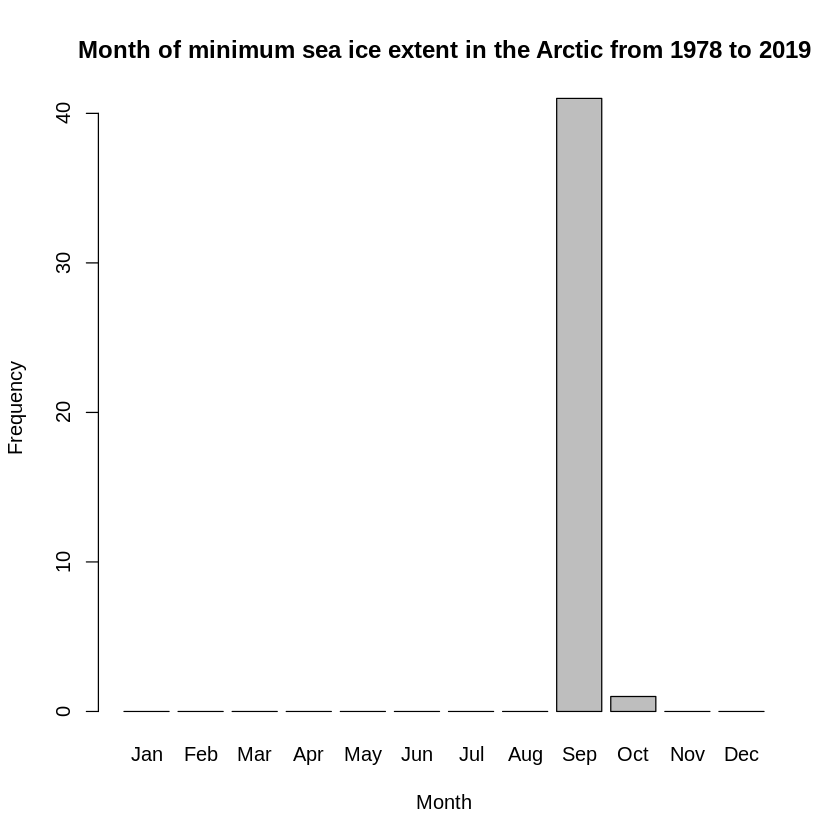

In [3]:
# Barplot for the minimum extent months frequency
barplot(min.month.freq,names.arg=month.vec,xlab="Month", ylab="Frequency",
       main = "Month of minimum sea ice extent in the Arctic from 1978 to 2019")

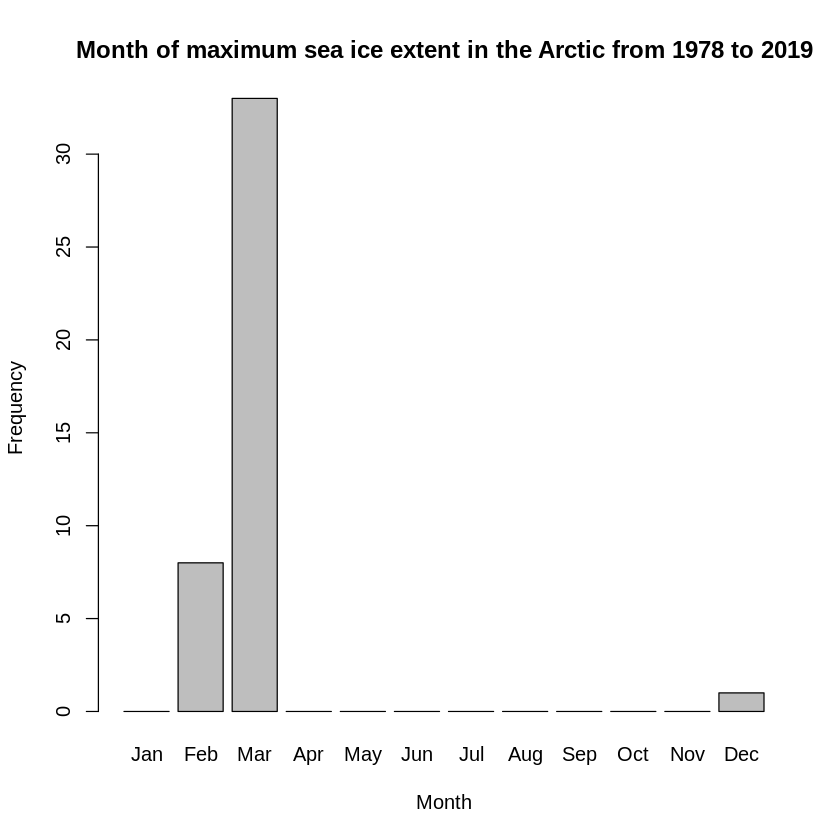

In [4]:
# Barplot for the maximum extent months frequency
barplot(max.month.freq,names.arg=month.vec,xlab="Month", ylab="Frequency",
       main = "Month of maximum sea ice extent in the Arctic from 1978 to 2019")

In [9]:
# Plot, month by month, the median value of the extent

# Library to easily manage data.frames
library(tidyverse)

# Defining function to extract an arbitrary quantile of the variable Extent
# from a data frame structured as 'ice.daily'
sea.ice.quantile <- function(data, quant){
    return(quantile(data$Extent, quant))
}

# Supporting vectors for paintings
month     <- 1:12
month.vec <- c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")

# Median, 95% quantile, and 5% quantile for sea-ice extent
medians      <- unlist(lapply(split(ice.daily, ice.daily$Month), sea.ice.quantile, quant = 0.50), 
                     use.names = FALSE)
medians.up   <- unlist(lapply(split(ice.daily, ice.daily$Month), sea.ice.quantile, quant = 0.95), 
                     use.names = FALSE)
medians.down <- unlist(lapply(split(ice.daily, ice.daily$Month), sea.ice.quantile, quant = 0.05), 
                     use.names = FALSE)

# Create a table with (median, month) to ease plotting
my.table <- as.data.frame(cbind(month,medians))

# Median monthly sea-ice extent in 2012 and 2018
year.2012 <- filter(ice.daily, Year == 2012)
medians.2012 <- unlist(lapply(split(year.2012, year.2012$Month), sea.ice.quantile, quant = 0.50), 
                     use.names = FALSE)

year.2018 <- filter(ice.daily, Year == 2018)
medians.2018 <- unlist(lapply(split(year.2018, year.2018$Month), sea.ice.quantile, quant = 0.50), 
                     use.names = FALSE)

# ... and 1980?
year.1980 <- filter(ice.daily, Year == 1980)
medians.1980 <- unlist(lapply(split(year.1980, year.1980$Month), sea.ice.quantile, quant = 0.50), 
                     use.names = FALSE)


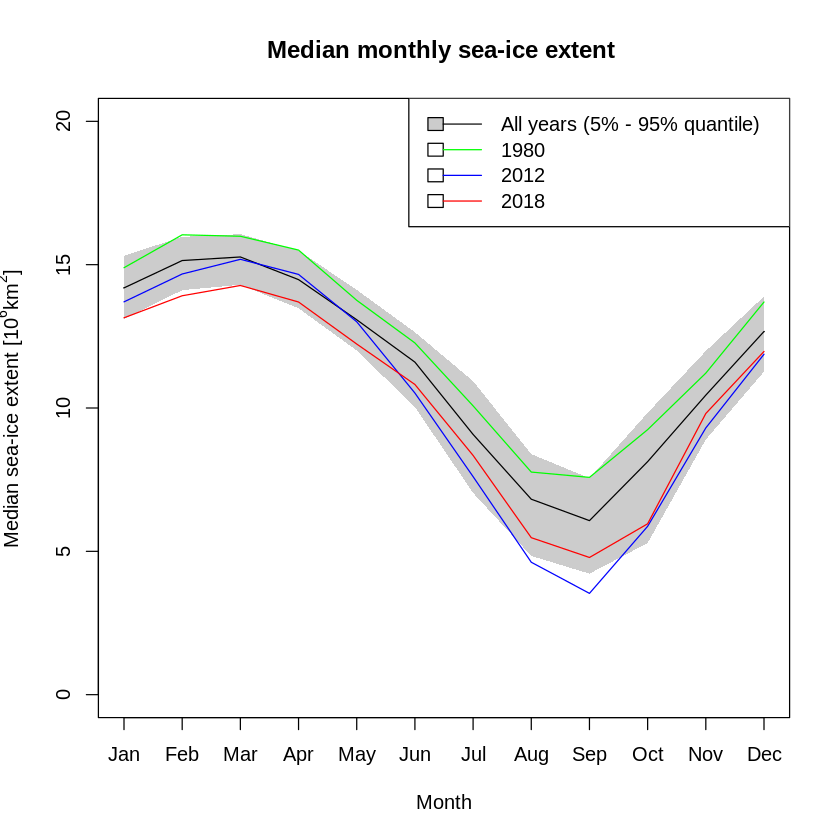

In [15]:
# Finally, the plot
plot(month, medians, xaxt = "n", ylim = c(0,20), type = "l",
    xlab = "Month", ylab = expression(paste("Median sea-ice extent [",10^6,"k",m^2,"]")),
    main = "Median monthly sea-ice extent ")
axis(side = 1, at = month, labels = month.vec)

polygon(c(month, rev(month)), c(medians.up, rev(medians.down)), col = "grey80", border = NA)

lines(month, medians, xaxt = "n", ylim=c(0,20))
lines(month, medians.1980, xaxt = "n", col="green")
lines(month, medians.2012, xaxt = "n", col="blue")
lines(month, medians.2018, xaxt = "n", col="red")

legend("topright",lty=1,c("All years (5% - 95% quantile)", "1980", "2012", "2018"), 
       col = c("black", "green", "blue", "red"),
      fill = c("grey80", NA, NA, NA))

As one can expect, the largest artic sea-ice extent is usually measured at the end of the winter (February or March), while the smallest one at the end of the summer (September or October).
This reflects also to the monthly median values of the sea-ice extent, which oscillate during the year, with a maximum typically in February-March and a minimum typically in September.
Taking the median values for two years in particular (2012 and 2018), one can see the effect of the global warming: in both cases, the extent is equal or smaller than the mean value, with 2018 showing a trend closer to the 5% lower quantile than to the mean value.
It is impressive, on the other hand, how the plot of 1980 almost overlap with the 95% higher quantile.